# Download Posters

In [1]:
import pandas

## Movie Download

### Connection

In [2]:
from kedro.config import ConfigLoader

conf_paths = ["../conf/local"]
conf_loader = ConfigLoader(conf_paths)
credentials = conf_loader.get("credentials*", "credentials*/**")

In [3]:
import tmdbsimple as tmdb

In [4]:
tmdb.API_KEY = credentials["tmdb_api"]["key"]

### Query

In [5]:
import random
import pandas

In [6]:
import time
import tqdm

In [7]:
%%time

n = 50_000
ids = [i for i in range(n)]
movies_raw = []

for i in tqdm.tqdm(ids):
    try:
        movie = tmdb.Movies(i).info()
        movies_raw.append(movie)
        #title = movie["original_title"]
    except Exception as ex:
        pass
        


100%|██████████| 50000/50000 [3:06:31<00:00,  4.47it/s]


CPU times: user 22min 2s, sys: 2min 21s, total: 24min 24s
Wall time: 3h 6min 31s


### Convert

In [8]:
movies = pandas.json_normalize(movies_raw)

_let's keep it SFW_

In [9]:
movies = movies[~movies["adult"]]

_preprocessing_

In [10]:
movies = movies.set_index("id")

In [11]:
movies["genre_names"] = movies["genres"].apply(lambda ls: [d["name"] for d in ls])

In [12]:
movies

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,genre_names
id,,,,,,,,,,,,,,,,,,,,,
2,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,,Ariel,False,6.8,128,NaN,NaN,NaN,NaN,"[Drama, Crime, Comedy]"
3,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,,Shadows in Paradise,False,7.2,125,NaN,NaN,NaN,NaN,"[Drama, Comedy]"
5,False,/u0zMKKpEdDWpOKmFW2sLbKKICJH.jpg,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,5.7,1907,NaN,NaN,NaN,NaN,"[Crime, Comedy]"
6,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,NaN,21000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.5,184,NaN,NaN,NaN,NaN,"[Action, Thriller, Crime]"
8,False,None,NaN,42000,"[{'id': 99, 'name': 'Documentary'}]",http://www.lifeinloops.com,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,...,A Megacities remix.,Life in Loops (A Megacities RMX),False,7.4,14,NaN,NaN,NaN,NaN,[Documentary]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,False,/ce4Zod7xonS3dOGYYTIAgQbvSbE.jpg,NaN,0,"[{'id': 16, 'name': 'Animation'}]",,tt0122735,it,La gabbianella e il gatto,A seagull is caught by the black tide of a sin...,...,,Lucky and Zorba,False,7.6,502,NaN,NaN,NaN,NaN,[Animation]
49995,False,/7EFEuvZ9ATxqfOzCD9hZRqZM78P.jpg,NaN,0,"[{'id': 37, 'name': 'Western'}, {'id': 28, 'na...",,tt1404677,en,The Gunslingers,While roaming the wild plains on a quest to fi...,...,,The Gunslingers,False,3.0,3,NaN,NaN,NaN,NaN,"[Western, Action]"
49996,False,None,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",,,de,"Und freitags in die ""Grüne Hölle""",Ernst Cantzler’s documentary about the soccer ...,...,,"Und freitags in die ""Grüne Hölle""",False,0.0,0,NaN,NaN,NaN,NaN,[Documentary]


In [13]:
movies.to_parquet("../data/04_feature/movies_50k.parquet")

## Poster Download

In [14]:
poster_dir = "../data/01_raw/posters"

In [15]:
movies = catalog.load("movies")

2021-03-19 14:29:00,384 - kedro.io.data_catalog - INFO - Loading data from `movies` (ParquetDataSet)...


In [16]:
movies

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,genre_names
id,,,,,,,,,,,,,,,,,,,,,
2,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,,Ariel,False,6.8,128,NaN,None,None,None,"[Drama, Crime, Comedy]"
3,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,,Shadows in Paradise,False,7.2,125,NaN,None,None,None,"[Drama, Comedy]"
5,False,/u0zMKKpEdDWpOKmFW2sLbKKICJH.jpg,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,5.7,1906,NaN,None,None,None,"[Crime, Comedy]"
6,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,NaN,21000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.5,184,NaN,None,None,None,"[Action, Thriller, Crime]"
8,False,None,NaN,42000,"[{'id': 99, 'name': 'Documentary'}]",http://www.lifeinloops.com,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,...,A Megacities remix.,Life in Loops (A Megacities RMX),False,7.4,14,NaN,None,None,None,[Documentary]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,/AmHOQ7rpHwiaUMRjKXztnauSJb7.jpg,NaN,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,Enter the World of Pandora.,Avatar,False,7.5,23043,87096.0,Avatar Collection,/gC3tW9a45RGOzzSh6wv91pFnmFr.jpg,/syGPZuzcHBBHMLiNDN0x0Tms4Fk.jpg,"[Action, Adventure, Fantasy, Science Fiction]"
19996,False,None,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",,tt0932661,en,Brother's War,The story is set in the latter days of World W...,...,,Brother's War,False,3.9,14,NaN,None,None,None,"[Action, Drama]"
19997,False,/TNfPn4Fwi0Fqx4BsjxOL3Tmscw.jpg,NaN,1250000,"[{'id': 53, 'name': 'Thriller'}]",,tt0046126,en,Niagara,"Rose Loomis and her older, gloomier husband, G...",...,A raging torrent of emotion that even nature c...,Niagara,False,6.8,215,NaN,None,None,None,[Thriller]


In [17]:
movies.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'belongs_to_collection.id',
       'belongs_to_collection.name', 'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'genre_names'],
      dtype='object')

In [18]:
def make_poster_url(poster_file_name, width=200):
    url = f"https://image.tmdb.org/t/p/w{width}{poster_file_name}"
    return url

In [19]:
from IPython.display import Image

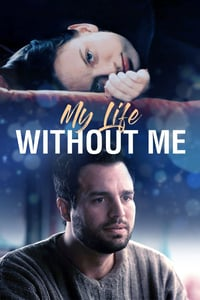

In [20]:
Image(make_poster_url("/sFSkn5rrQqXJkRNa2rMWqzmEuhR.jpg"))

In [21]:
import requests
import os

In [22]:
for poster_file_name in tqdm.tqdm(movies["poster_path"]):
    if poster_file_name is not None:
        poster_url = make_poster_url(poster_file_name, width=500)
        #Image(poster_url)
        response = requests.get(poster_url)
        poster_path = f"{poster_dir}{poster_file_name}"
        #print(poster_path)
        with open(poster_path, "wb") as poster_file:
            poster_file.write(response.content)

100%|██████████| 12085/12085 [25:24<00:00,  7.93it/s]
